In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Unzip the zip file containing your dataset and metadata

In [ ]:
!unzip "/content/drive/My Drive/562468_1022626_bundle_archive.zip"

In [ ]:
!unzip "/content/drive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/548681_1157383_bundle_archive.zip"

Importing the Libraries

In [4]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import imutils
from imutils import paths
import random

In [44]:
%%bash
rm -rf dataset/train/covid/
rm -rf dataset/train/normal/
rm -rf dataset/test/covid
rm -rf dataset/test/normal
rm -rf dataset
mkdir -p dataset/train/covid
mkdir -p dataset/train/normal
mkdir -p dataset/test/covid
mkdir -p dataset/test/normal

In [45]:
dataset_path = './dataset'

In [46]:
covid_dataset_path = './Coronahack-Chest-XRay-Dataset' 

In [ ]:
import os
os.getcwd()

'/content'

In [47]:
df = pd.read_csv('Chest_xray_Corona_Metadata.csv')
print(df['Label'].value_counts())
print(df['Label_2_Virus_category'].value_counts())
print(os.path)

Pnemonia    4334
Normal      1576
Name: Label, dtype: int64
COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64
<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>


In [ ]:
# loop over the rows of the COVID-19 data frame to set the training data
for (i, row) in df.iterrows():

    if row["Label_2_Virus_category"] == "COVID-19" and row['Dataset_type'] == "TRAIN":
        # build the path to the input image file
        imagePath = os.path.sep.join([f"{covid_dataset_path}/Coronahack-Chest-XRay-Dataset/train", row["X_ray_image_name"]])
        print(imagePath)

        if not os.path.exists(imagePath):
            continue
        outputPath = os.path.sep.join([f"{dataset_path}/train/covid", row["X_ray_image_name"]])
        print(outputPath)
        # copy the image
        shutil.copy2(imagePath, outputPath)

In [ ]:
# loop over the rows of the Normal data frame for setting the training dataset
count = 0
for (i, row) in df.iterrows():
    # As the dataset is imbalanced sample the data to prevent over fitting.
    if count > 300:
      break

    if row["Label"] == "Normal" and row["Dataset_type"] == "TRAIN":
        # build the path to the input image file
        imagePath = os.path.sep.join([f"{covid_dataset_path}/Coronahack-Chest-XRay-Dataset/train", row["X_ray_image_name"]])
        print(imagePath)

        if not os.path.exists(imagePath):
            continue
        outputPath = os.path.sep.join([f"{dataset_path}/train/normal", row["X_ray_image_name"]])
        print(outputPath)
        # copy the image
        shutil.copy2(imagePath, outputPath)
        count+=1

Moving a part of the training dataset to the test dataset

In [50]:
basePath = './dataset/train/normal'
imagePaths = list(paths.list_images(basePath))
samples = 20
# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    print(imagePath)
    if os.path.exists(imagePath):
      filename = imagePath.split(os.path.sep)[-1]
      outputPath = os.path.sep.join([f"{dataset_path}/test/normal", filename])

      # cut the image
      shutil.move(imagePath, outputPath)

./dataset/train/normal/IM-0349-0001.jpeg
./dataset/train/normal/IM-0448-0001.jpeg
./dataset/train/normal/IM-0493-0001.jpeg
./dataset/train/normal/IM-0235-0001.jpeg
./dataset/train/normal/IM-0357-0001.jpeg
./dataset/train/normal/IM-0411-0001.jpeg
./dataset/train/normal/IM-0391-0001.jpeg
./dataset/train/normal/IM-0401-0001.jpeg
./dataset/train/normal/IM-0251-0001.jpeg
./dataset/train/normal/IM-0403-0001.jpeg
./dataset/train/normal/IM-0162-0001.jpeg
./dataset/train/normal/IM-0461-0001.jpeg
./dataset/train/normal/IM-0225-0001.jpeg
./dataset/train/normal/IM-0319-0001.jpeg
./dataset/train/normal/IM-0151-0001.jpeg
./dataset/train/normal/IM-0457-0001.jpeg
./dataset/train/normal/IM-0152-0001.jpeg
./dataset/train/normal/IM-0187-0001.jpeg
./dataset/train/normal/IM-0428-0001.jpeg
./dataset/train/normal/IM-0229-0001.jpeg


In [51]:
basePath = './dataset/train/covid'
imagePaths = list(paths.list_images(basePath))
samples = 20
# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    print(imagePath)
    if os.path.exists(imagePath):
      filename = imagePath.split(os.path.sep)[-1]
      outputPath = os.path.sep.join([f"{dataset_path}/test/covid", filename])

      # cut the image
      shutil.move(imagePath, outputPath)

./dataset/train/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg
./dataset/train/covid/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png
./dataset/train/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg
./dataset/train/covid/kjr-21-e24-g003-l-a.jpg
./dataset/train/covid/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg
./dataset/train/covid/all14238-fig-0001-m-b.jpg
./dataset/train/covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg
./dataset/train/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg
./dataset/train/covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png
./dataset/train/covid/F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg
./dataset/train/covid/41591_2020_819_Fig1_HTML.webp-day10.png
./dataset/train/covid/171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg
./dataset/train/covid/4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg
./dataset/train/covid/2C10A413-AABE-4807-8CCE-6A2025594067.jpeg
./dataset/train/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg
./dataset/train/covid/8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg
./dataset/train/covi

In [33]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

38 20
281 20


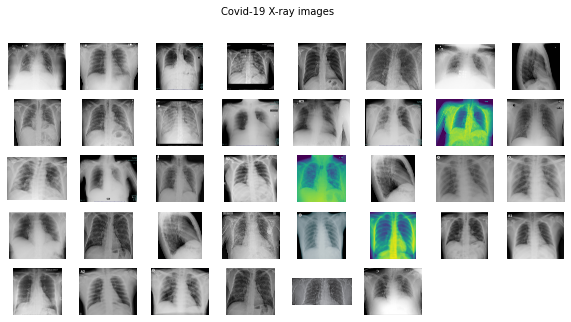

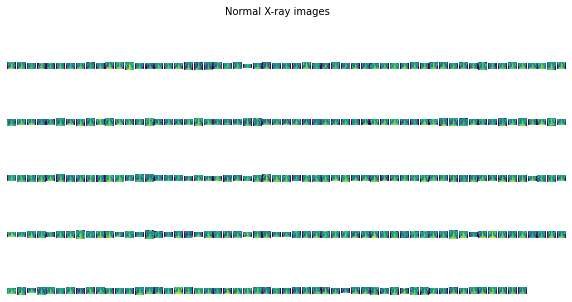

In [52]:
from imutils import paths
covid_images = list(paths.list_images(f"{dataset_path}/train/covid"))
normal_images = list(paths.list_images(f"{dataset_path}/train/normal"))
covid_test_images = list(paths.list_images(f"{dataset_path}/test/covid"))
normal_test_images = list(paths.list_images(f"{dataset_path}/test/normal"))
print(len(covid_images), len(covid_test_images))
print(len(normal_images), len(normal_test_images))
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

Importing the libraries

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Preprocessing the tarining directory and Validation directory

In [53]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        './dataset/train',
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        './dataset/test',
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 319 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Building the CNN 

In [54]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)            

Building the ResNet Model

In [38]:
class MyCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_acc') > 0.95 :
      print("\n Recahed accuracy above 95% ")
      self.model.stop_training = True

Fitting your Model

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist_model = model.fit(x=train_generator, validation_data=validation_generator, epochs=10, callbacks=[MyCallback()])

Epoch 1/10
16/16 [==============================] - 46s 3s/step - loss: 0.4277 - acc: 0.8370 - val_loss: 0.8140 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 46s 3s/step - loss: 0.3195 - acc: 0.8809 - val_loss: 0.8642 - val_acc: 0.5000
Epoch 3/10
16/16 [==============================] - 46s 3s/step - loss: 0.2377 - acc: 0.9091 - val_loss: 0.4629 - val_acc: 0.8500
Epoch 4/10
16/16 [==============================] - 46s 3s/step - loss: 0.1490 - acc: 0.9498 - val_loss: 0.2355 - val_acc: 0.9250
Epoch 5/10
16/16 [==============================] - 46s 3s/step - loss: 0.0971 - acc: 0.9592 - val_loss: 0.2126 - val_acc: 0.9250
Epoch 6/10
16/16 [==============================] - 47s 3s/step - loss: 0.0986 - acc: 0.9592 - val_loss: 0.4237 - val_acc: 0.8250
Epoch 7/10
16/16 [==============================] - 46s 3s/step - loss: 0.1323 - acc: 0.9467 - val_loss: 0.2418 - val_acc: 0.9500
Epoch 8/10
16/16 [==============================] - 46s 3s/step - loss: 0.1116 - acc: 0.96

Testing on an unseen image

In [62]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/images/extubation-8.jpg', target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 0:
  print("Covid")
else:
  print("Non-Covid")

Non-Covid


Visualizing the Simple CNN Model's accuracy curve

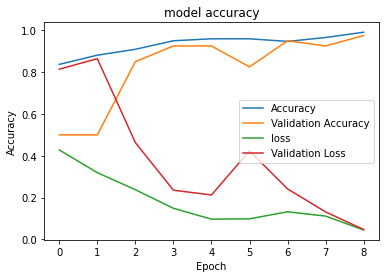

In [63]:
plt.plot(hist_model.history["acc"])
plt.plot(hist_model.history['val_acc'])
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()